In [1]:
import utils
import os
import numpy as np
import scanpy.api as sc
from matplotlib import pyplot as plt
import pandas as pd

In [29]:
sc.settings.set_figure_params(dpi=80)

In [2]:
%matplotlib inline

In [3]:
CUR_DIR = os.getcwd()
ROOT = os.path.dirname(os.path.dirname(CUR_DIR))

In [4]:
sc02 = utils.load_10x_scanpy(os.path.join(ROOT, 'SC02'), 'SC02')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
sc03 = utils.load_10x_scanpy(os.path.join(ROOT, 'SC03'), 'SC03')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
sc03_preds = pd.read_csv('./sc03-preds.csv', index_col=0)

In [7]:
as_bcells2 = sc03_preds[sc03_preds.idxmax(axis=1) == "2"].index

In [8]:
plasma_cells = sc03.obs[sc03.obs.cluster == 7].index

In [9]:
plasma_as_bcells2 = set(as_bcells2) & set(plasma_cells)

In [10]:
import seaborn

In [110]:
df = sc02.obs.loc[sc02.obs.cluster.isin([0,2]), :]

In [111]:
df2 = sc03.obs.loc[plasma_cells, :]
df2.loc[plasma_as_bcells2, 'cluster'] = 6

In [112]:
b_cells_de_genes = [
    "mt-Co1",
    "mt-Atp6",
    "mt-Co3",
    "mt-Co2",
    "mt-Cytb",
    "mt-Nd1",
    "mt-Nd4",
    "mt-Nd2",
    "mt-Nd3",
    "Plac8",
    "mt-Nd5",
    "Dnajc7",
    "mt-Nd4l",
    "Cd24a",
    "S100a6",
    "Ndufs8",
]

In [113]:
df = df.join(pd.DataFrame(sc02[:,b_cells_de_genes][sc02.obs.cluster.isin([0,2]),:].X.todense(), 
                          index=sc02.obs[sc02.obs.cluster.isin([0,2])].index, 
                          columns=b_cells_de_genes))

In [114]:
df2 = df2.join(pd.DataFrame(sc03[:,b_cells_de_genes][plasma_cells, :].X.todense(),
                            index=sc03.obs.loc[plasma_cells].index,
                            columns=b_cells_de_genes))

In [115]:
df = pd.concat([df, df2])

In [104]:
def violin(df, x, y, title, xticklabels=None):
    plt.figure(figsize=(10, 10))
    seaborn.stripplot(x=x, y=y, data=df, jitter=True, alpha=0.4, color="black", size=2)
    ax = seaborn.violinplot(x=x, y=y, data=df, inner=None)
    if xticklabels:
        ax.set_xticklabels(xticklabels)
        #ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(title)
    return ax

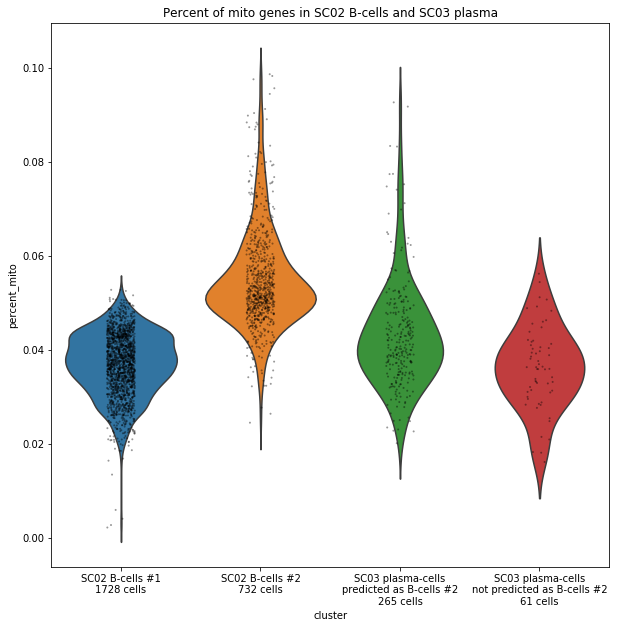

In [105]:
clusters = ['SC02 B-cells #1\n{} cells'.format(np.sum(sc02.obs.cluster == 0)), 
            'SC02 B-cells #2\n{} cells'.format(np.sum(sc02.obs.cluster == 2)), 
            'SC03 plasma-cells\npredicted as B-cells #2\n{} cells'.format(len(plasma_as_bcells2)),
            'SC03 plasma-cells\nnot predicted as B-cells #2\n{} cells'.format(len(plasma_cells) - len(plasma_as_bcells2)),
           ]
violin(df, 'cluster', 'percent_mito', 'Percent of mito genes in SC02 B-cells and SC03 plasma', xticklabels=clusters)

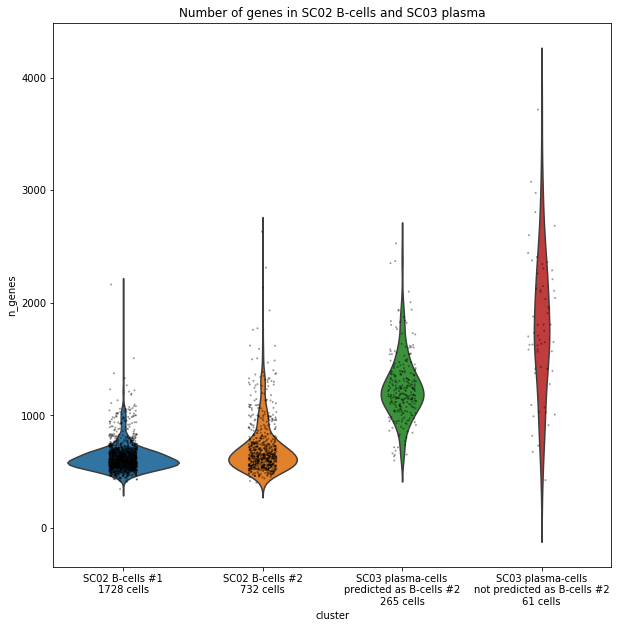

In [106]:
violin(df, 'cluster', 'n_genes', 'Number of genes in SC02 B-cells and SC03 plasma', xticklabels=clusters)

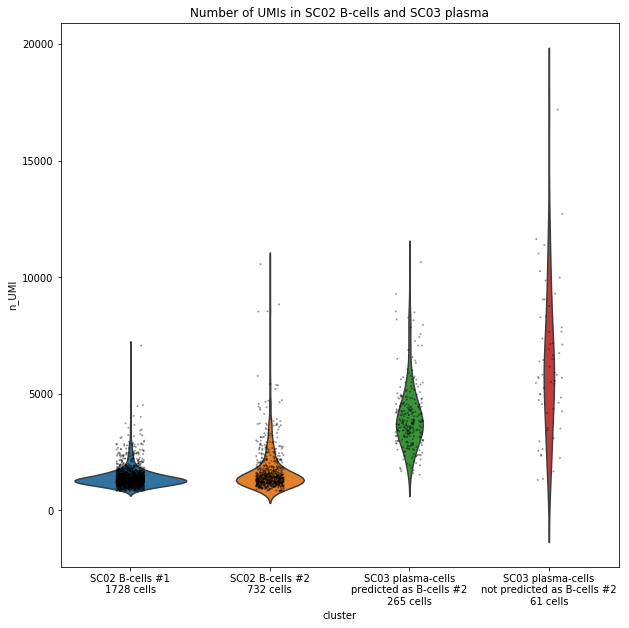

In [107]:
violin(df, 'cluster', 'n_UMI', 'Number of UMIs in SC02 B-cells and SC03 plasma', xticklabels=clusters)

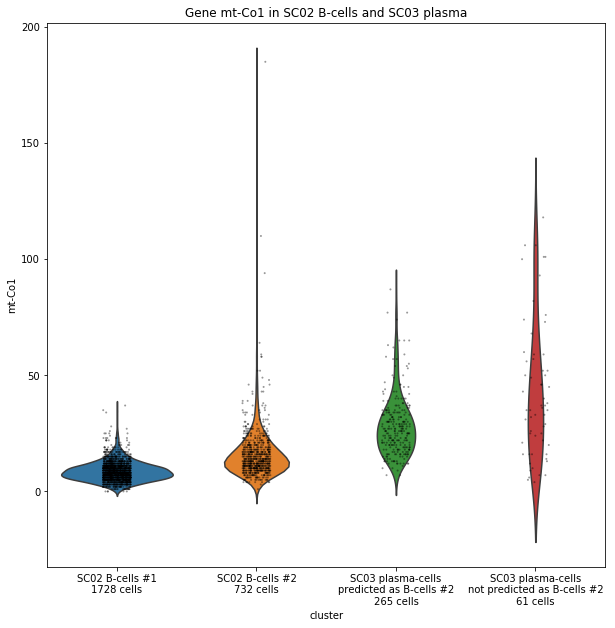

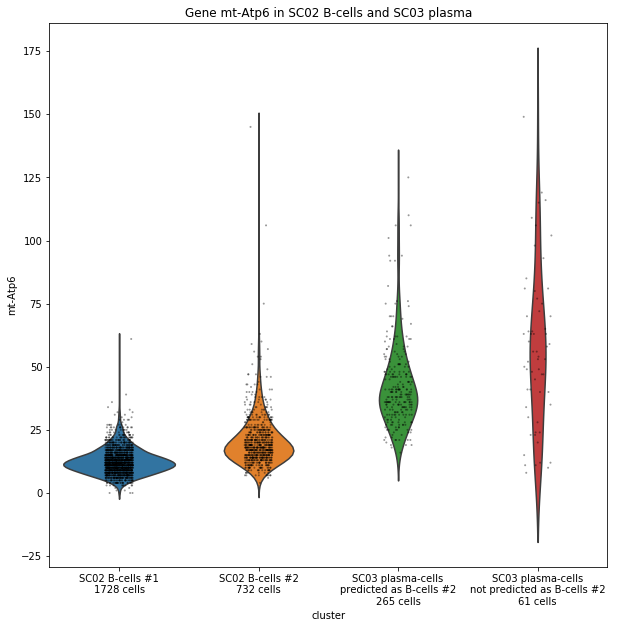

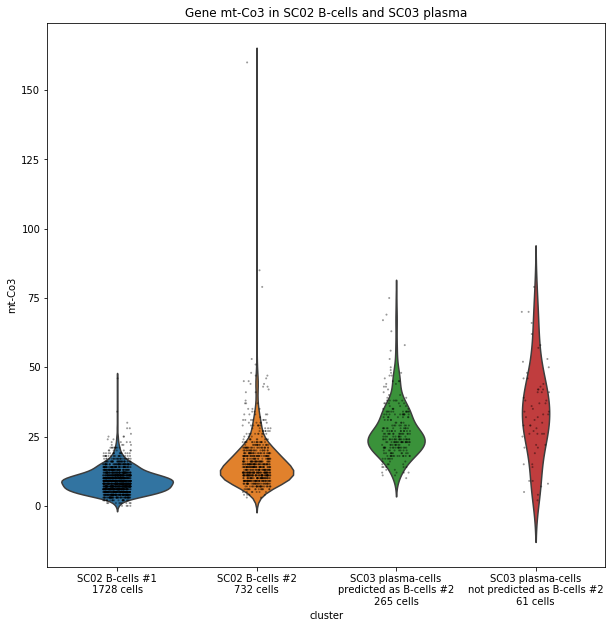

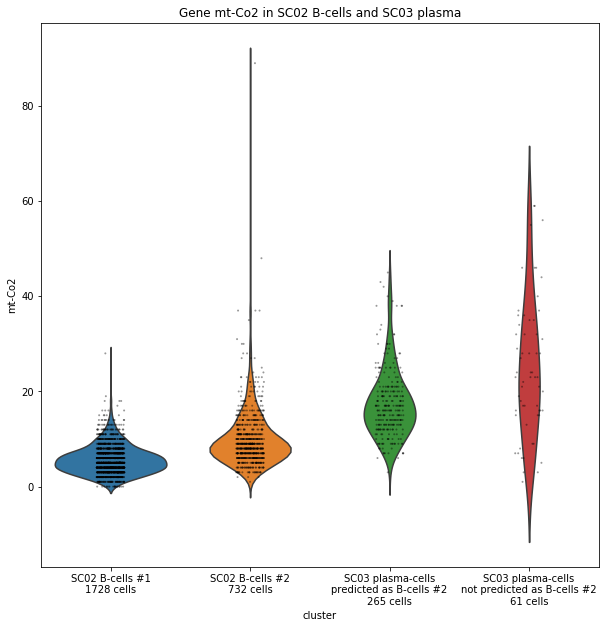

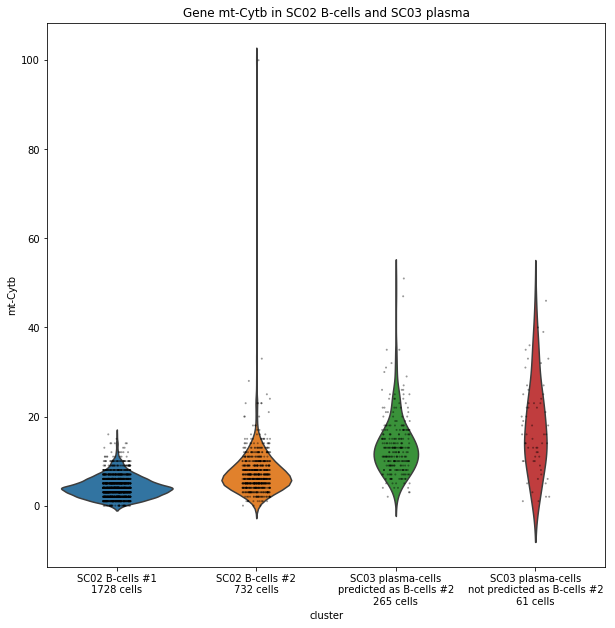

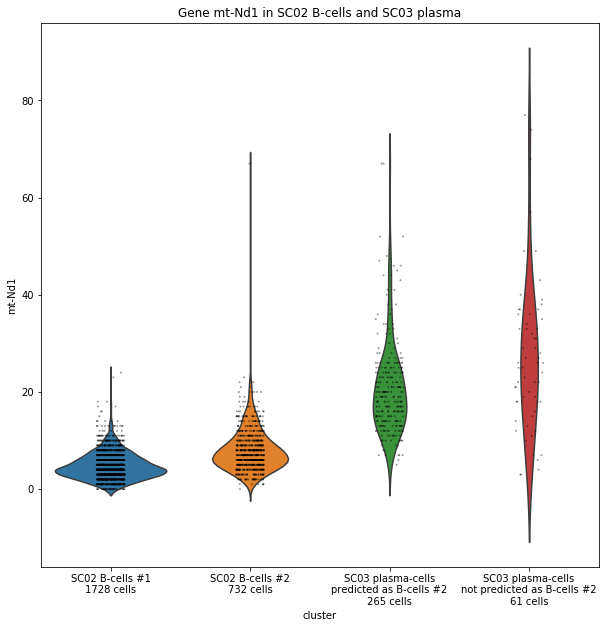

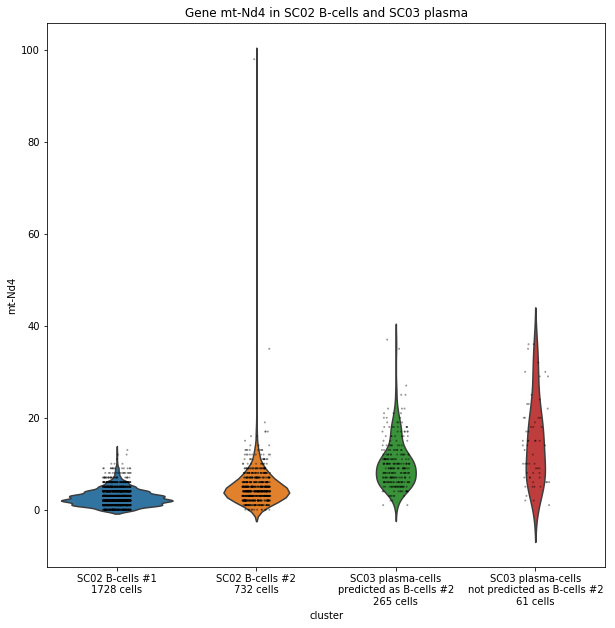

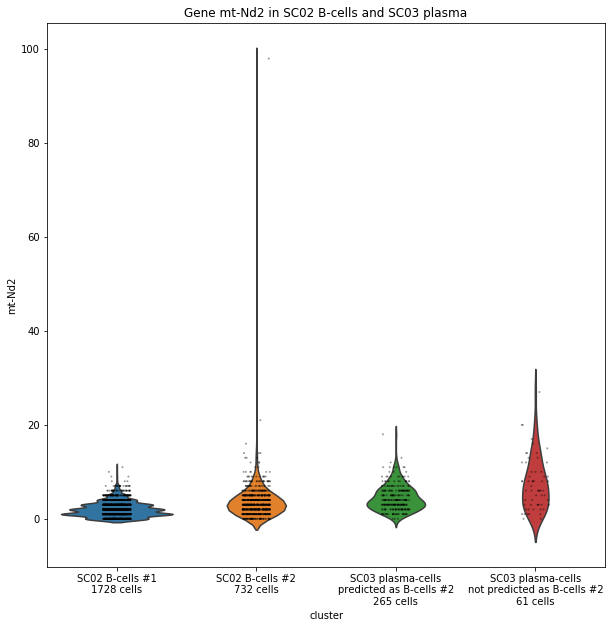

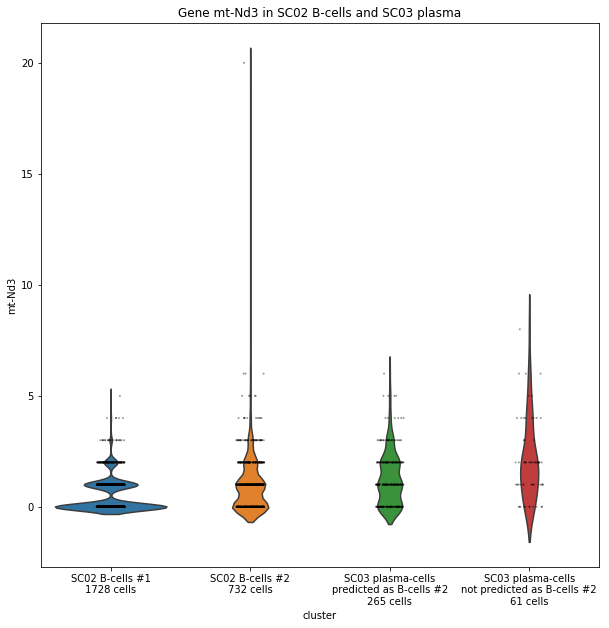

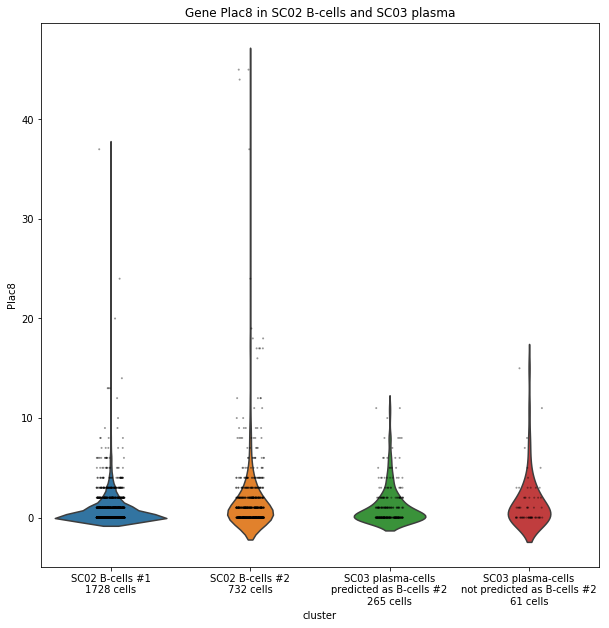

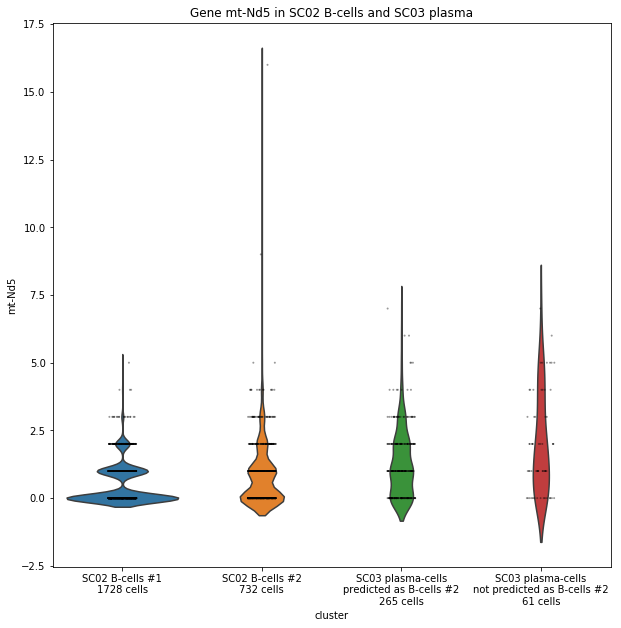

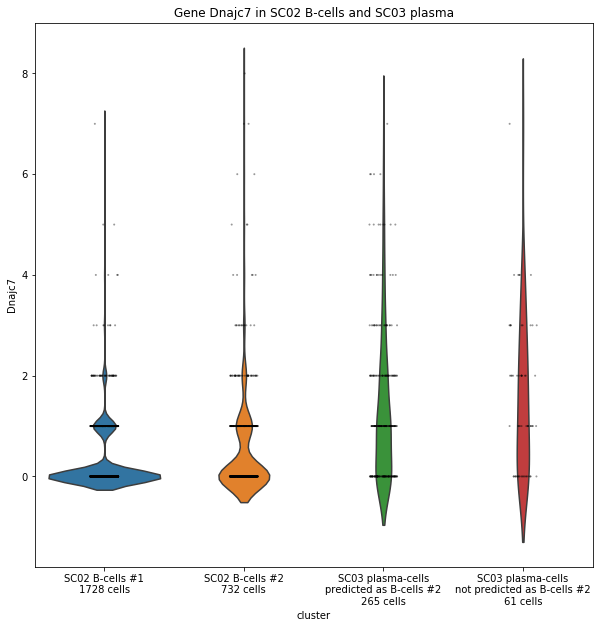

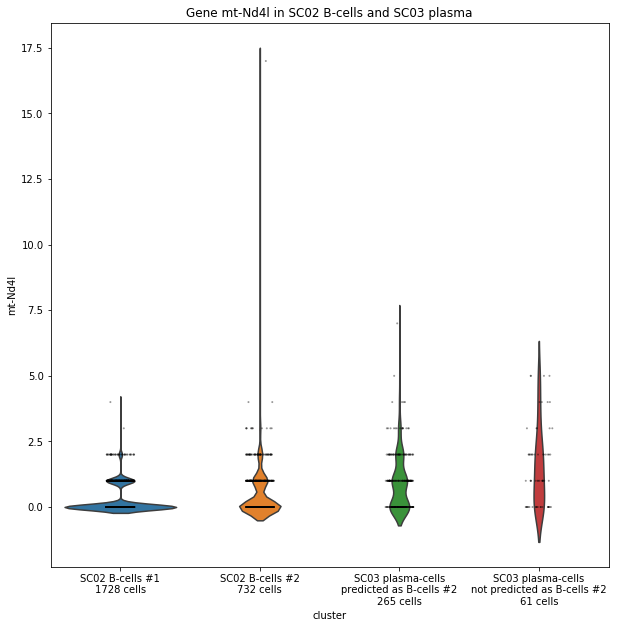

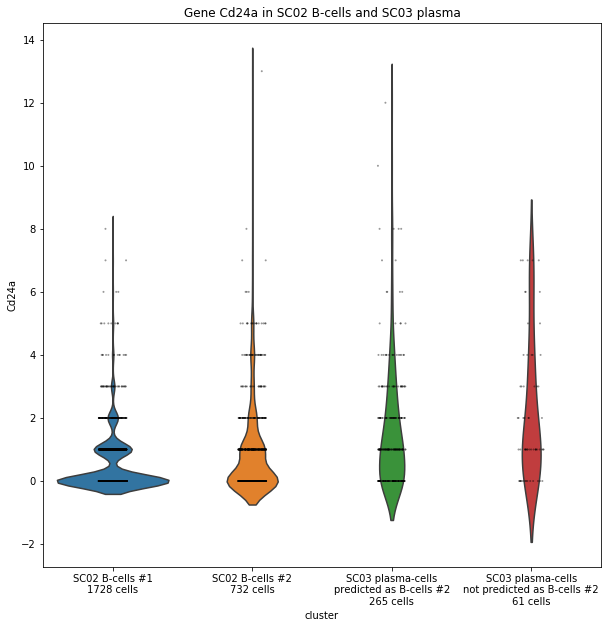

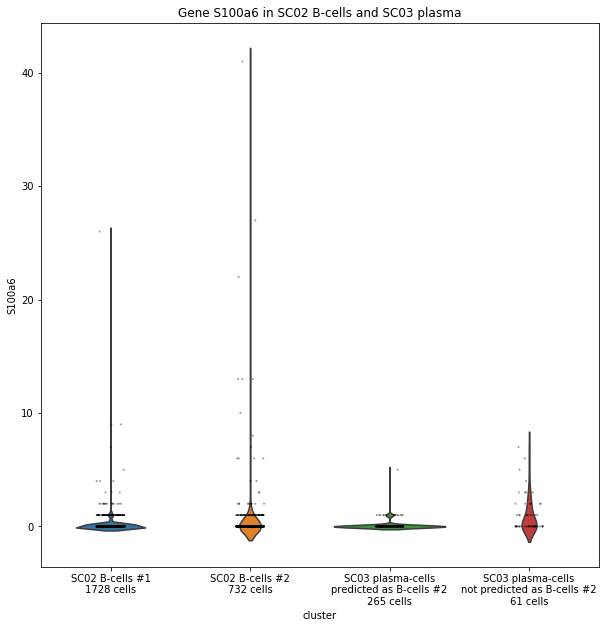

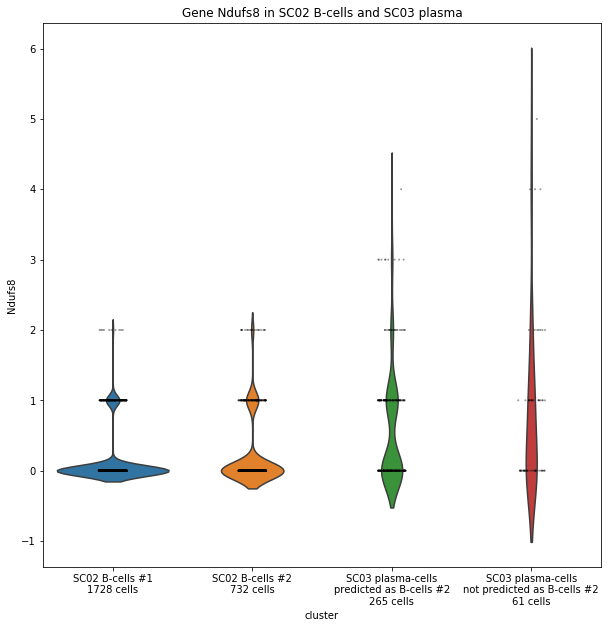

In [116]:
for gene in b_cells_de_genes:
    violin(df, 'cluster', gene, 'Gene {} in SC02 B-cells and SC03 plasma'.format(gene), xticklabels=clusters)